# Multiconilearity


Multicollinearity occurs when predictor variables in a regression model are highly correlated, making it difficult to distinguish their individual effects. In regression analysis, multicollinearity complicates coefficient estimation and interpretation because it can dim unique contribution of each predictor variable.

## Examples:

- Temperature and humidity correlate; predicting rain probability with both of these two can lead to conilearity.
- Gender and income can correlate, leading to conilearity in specific regressions.


### Finding inverse of a matrix with linear combination column in Python


In [1]:
import numpy as np

np.random.seed(12)

# Enteros aleatorios
matriz = np.random.randint(0, 100, size=(10, 9), dtype=np.int64)

# Combinacion lineal
suma_columnas = matriz[:, 1] - 2 * matriz[:, 5] + 3*matriz[:, 7]

# Stack combinacion a matriz
matriz = np.column_stack((matriz, suma_columnas))
print("La matriz es: ")
print(matriz)
print("\n")

# Calcular la inversa de la matriz
inversa = np.linalg.inv(matriz)
print("La matriz inversa es: ")
print(inversa)



La matriz es: 
[[ 75  27   6   2   3  67  76  48  22  37]
 [ 49  52   5  13  89  34  75  74   0 206]
 [ 76  13  82  89  35  62  35  33  30 -12]
 [ 63  96  18  86  50  80  84   6  73 -46]
 [ 45  30  32  27  59  89  59  88  79 116]
 [ 25  97  56   4  96  68  65  44  37  93]
 [ 75  68  53  75  53  47  60  96  42 262]
 [ 70  70  67   2  28  74  58  59  84  99]
 [ 99  54  55  84  97  20  29  69  51 221]
 [ 43  32  43  18  70  91  34  53  58   9]]


La matriz inversa es: 
[[ 7.57575758e-02  0.00000000e+00 -8.83838384e-03 -2.02020202e-02
   6.06060606e-02 -6.56565657e-02  6.31313131e-03  1.51515152e-02
   2.27272727e-02  5.05050505e-03]
 [-6.19020634e+13  7.72439775e+13  1.06410527e+13  1.79646923e+13
  -4.69810422e+13 -7.03445439e+13  7.90744681e+12  5.86748932e+13
  -4.07266658e+13  4.93396189e+13]
 [-2.20586247e-02  3.36285564e-02  1.81912862e-02 -1.82110918e-03
   1.88165452e-02 -6.13856493e-02  2.26181494e-03  2.26317972e-02
  -1.67663357e-02 -4.48974828e-03]
 [-7.67918746e-02 -6.2547256

### Differences between Python, R and Julia

The principal difference is that Python and Julia give a result while R gives the following error : "Error in solve.default(matriz): sistema es computacionalmente singular: número de condición recíproco = 3.94281e-18"
This could be caused due to Python and Julia giving pseudoinverses as results, opposed to R that just tries to find the normal inverse.


# Analyzing RCT data with Precision Adjustment

In [2]:
#!pip install pyreadr
import pandas as pd
import pyreadr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
#Primer bullet point


Penn = pd.read_csv("C:/Users/Frank/Downloads/penn_jae.dat", sep='\s', engine='python')
Penn = Penn[(Penn['tg'] == 2) | (Penn['tg'] == 0)]

# Creating a binary variable for Treatment Group 2
Penn['T2'] = (Penn['tg'] == 2).astype(int)
Penn['dep'] = Penn['dep'].astype('category')

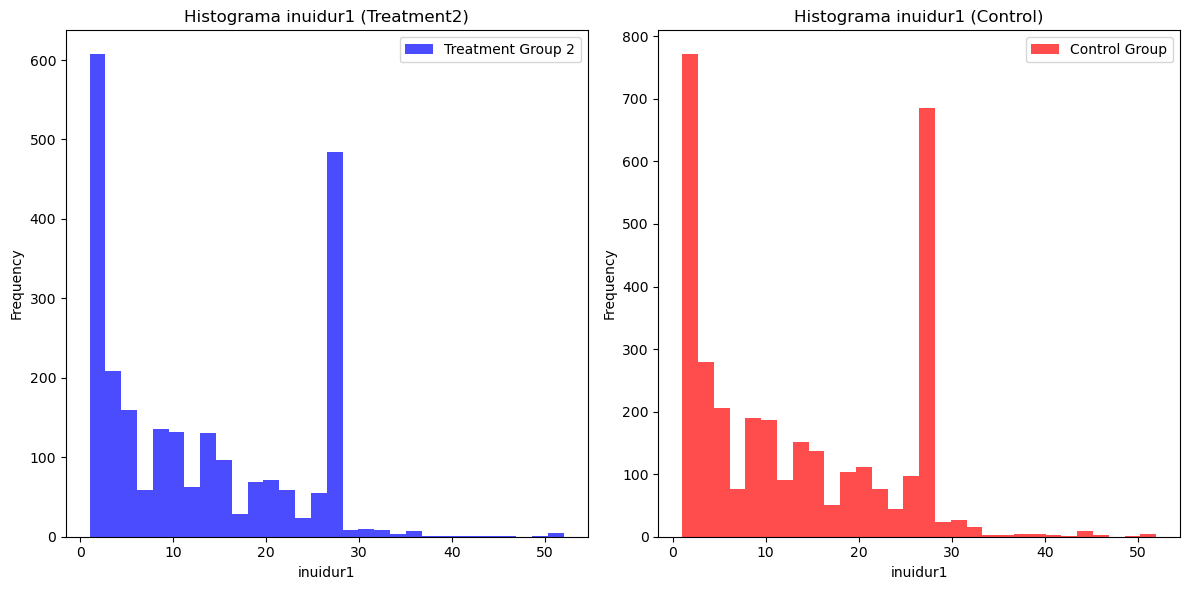

In [3]:
#segundo bullet point
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Penn[Penn['T2'] == 1]['inuidur1'].dropna(), bins=30, alpha=0.7, color='blue', label='Treatment Group 2')
plt.title('Histograma inuidur1 (Treatment2)')
plt.xlabel('inuidur1')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(Penn[Penn['T2'] == 0]['inuidur1'].dropna(), bins=30, alpha=0.7, color='red', label='Control Group')
plt.title('Histograma inuidur1 (Control)')
plt.xlabel('inuidur1')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

# Define the formula for the regression model
formula1 = "T2 ~ (female + black + othrace + C(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd)**2"

# Fit the regression model with robust standard errors
model_results = smf.ols(formula1, data=Penn).fit().get_robustcov_results(cov_type="HC1")
print(model_results.summary())
print("Number of regressors in the basic model:", len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           5.79e-51
Time:                        23:38:21   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\Frank\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Get data from R for comparison
import pyreadr
import pandas as pd
import statsmodels.api as sm
import numpy as np
#!pip install rpy2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

pandas2ri.activate()

# Load your RData file
ro.r.load('C:/Users/Frank/Downloads/m_reg_g2.RData')

my_dataframe = ro.r['my_dataframe']

print(my_dataframe.head())


result = pyreadr.read_r('C:/Users/Frank/Downloads/m_reg_g2.RData')

X_vars = result['X1']

model_results = sm.OLS(y, X_vars).fit().get_robustcov_results(cov_type="HC1")

print(model_results.summary())
print("Number of regressors in the basic model:", len(model_results.params), '\n')

In [ ]:
# Model Specification
# Take the log of inuidur1
Penn["log_inuidur1"] = np.log(Penn["inuidur1"])
log_inuidur1 = pd.DataFrame(np.log(Penn["inuidur1"])).reset_index(drop=True)

# No adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

ols_cl = smf.ols(formula=formula_cl, data=Penn).fit().get_robustcov_results(cov_type="HC1")

# Adding controls
formula_cra = 'log_inuidur1 ~ T2 + (female + black + othrace + C(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd)**2'

# Fit the OLS model with controls and robust standard errors
ols_cra = smf.ols(formula=formula_cra, data=Penn).fit().get_robustcov_results(cov_type="HC1")

# Print the summary of the regression results for both models
print(ols_cl.summary())
print(ols_cra.summary())
print("Number of regressors in the control model:", len(ols_cra.params), '\n')

In [ ]:
# Model Specification using data from R
# No adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'
pandas2ri.activate()

# Load your RData file
ro.r.load('C:/Users/Frank/Downloads/ols_cra_reg_g2.RData')

my_datafram = ro.r['my_datafram']

print(my_datafram.head())


ols_cl = smf.ols(formula=formula_cl, data=Penn).fit().get_robustcov_results(cov_type="HC1")
result = pyreadr.read_r('C:/Users/Frank/Downloads/ols_cra_reg_g2.RData')
X_vars = result['X1']
# Fit the OLS model with controls using data from R and robust standard errors
ols_cra = smf.ols(formula=formula_cra, data=Penn).fit().get_robustcov_results(cov_type="HC1")

# Print the summary of the regression results for both models
print(ols_cl.summary())
print(ols_cra.summary())
print("Number of regressors in the interactive model:", len(ols_cra.params), '\n')

# Create Y variable
log_inuidur1 = pd.DataFrame(np.log(Penn["inuidur1"])).reset_index(drop=True)
# Load your RData file
ro.r.load('C:/Users/Frank/Downloads/ols_ira_reg_g2.RData')

my_datafr = ro.r['my_datafr']

print(my_datafr.head())
# Get data from R for the interactive regression analysis
result = pyreadr.read_r('C:/Users/Frank/Downloads/ols_ira_reg_g2.RData')
X_vars = result['S1']

# Fit the OLS model for interactive analysis using data from R and robust standard errors
ols_ira = sm.OLS(log_inuidur1, X_vars).fit().get_robustcov_results(cov_type="HC1")

# Print the summary of the regression results
print(ols_ira.summary())

In [ ]:
# Lasso
import hdmpy
# Load your RData file
ro.r.load('C:/Users/Frank/Downloads/ols_ira_reg_g2.RData')

my_datafra = ro.r['my_datafra']

print(my_datafra.head())
# Get data from R for Lasso analysis
result = pyreadr.read_r('C:/Users/Frank/Downloads/ols_ira_reg_g2.RData')
X_vars = result['S']
result = hdmpy.rlassoEffects(X_vars, log_inuidur1, index=0)

# Extract coefficients and standard errors from the Lasso results
rlasso_ira = pd.DataFrame(np.array((result.res['coefficients'][0], result.res['se'][0], \
                                     result.res['t'][0], result.res['pval'][0])).reshape(1, 4),
                          columns=['Coef.', "Std.Err.", "t", 'P>|t|'], index=['T2'])

# Results
result.res.keys()
result.res['coeficients']

rlasoo_ira

In [ ]:
#RESULTADOS
table2 = np.zeros((2, 4))
table2[0, 0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0, 1] = ols_cra.summary2().tables[1]['Coef.']['T2']
table2[0, 2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0, 3] = rlasso_ira['Coef.']['T2']

table2[1, 0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1, 1] = ols_cra.summary2().tables[1]['Std.Err.']['T2']
table2[1, 2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1, 3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns=["CL", "CRA", "IRA", "IRA Lasso"],
                       index=["estimate", "standard error"])

table2
table2.to_latex
print(table2.to_latex())

In [ ]:
#cuarto bullet point 
import matplotlib.pyplot as plt

# ols_ira

coefficients = {
    'T2*female': ols_ira.params['T2:female'],
    'T2*black': ols_ira.params['T2:black'],
    'T2*agelt35': ols_ira.params['T2:agelt35'],
    'T2*factor(dep)1': ols_ira.params['T2:C(dep)[T.1]']
}

# Create lists for the plot
labels = list(coefficients.keys())
values = list(coefficients.values())

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['purple', 'red', 'pink', 'brown'])
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Interaction Terms in IRA Model')
plt.axhline(0, color='gray', linewidth=0.8)  
plt.show()


# A Crash Course in Good and Bad Controls

In [ ]:
#pip install numpy pandas statsmodels causalgraphicalmodels

In [ ]:
#pip install Graphviz

In [ ]:
#pip install sympy matplotlib networkx

In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm, statsmodels.formula.api as smf
import sympy, matplotlib, math, random, networkx
from causalgraphicalmodels import CausalGraphicalModel
from statsmodels.iolib.summary2 import summary_col

## Model 1

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["z","y","x"],
                                 edges=[("z","y"),
                                        ("z","x"),
                                        ("x","y")])
sprinkler.draw()

In [ ]:
np.random.seed(420)
n=1000
z=np.random.normal(0,1,1000).reshape((1000,1))
x=0.42*z+np.random.normal(0,1,1000).reshape((1000,1))
y=x+4.2*z+np.random.normal(0,1,1000).reshape((1000,1))

d=np.hstack((z,x,y))
data=pd.DataFrame(d,columns=["z","x","y"])

In [ ]:
data

In [ ]:
no_control="y~x"
using_control="y~x+z"

no_control=smf.ols(no_control,data=data).fit()
using_control=smf.ols(using_control,data=data).fit()

dfoutput=summary_col([no_control,using_control],stars=True)
print(dfoutput)

### Real data the model can fit:

If we study the relationship between police intervention (X) and crime rates (Y), economic conditions (Z) can be an important control variable. Wealthier neighborhoods may have lower crime rates and more resources for police, so controlling for economic conditions helps clarify the relationship between police intervention and crime rates.

## Model 8

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["x","y","z"],
                                 edges=[("x","y"),("z","y")])
sprinkler.draw()

In [ ]:
np.random.seed(1313)
n = 1000
x = np.random.normal(0,1,1000).reshape((1000, 1))
z = np.random.normal(0,1,1000).reshape((1000, 1))
y = 0.7*x + np.random.normal(0,1,1000).reshape((1000, 1))

d = np.hstack((x, z, y))
data = pd.DataFrame(d, columns = ["x", "z", "y"])

In [ ]:
data

In [ ]:
no_control = "y ~ x"          
using_control = "y ~ x + z"      

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)

### Real data the model can fit:

For studies in the education sector, we can explre the relation between class size (X) and academic performance (Y), including aneutral variable for socioeconomic status (Z). Including Z allows us to improve the model estimation and its precision. When including Z, the effect of X on Y dims, which could indicate that there may be aditional variables that could explain academic performance additional to class size.

## Model 11

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["z","y","x"],
                                 edges=[("x","z"),("z","y")])
sprinkler.draw()

In [ ]:
np.random.seed(6969)

n = 1000            
x = np.random.normal(0, 1, 1000).reshape((1000, 1))
z = 0.69*x + np.random.normal(0, 1, 1000).reshape((1000, 1))
y = 6.9*z + np.random.normal(0, 1, 1000).reshape((1000, 1))

d = np.hstack((z, x, y))
data = pd.DataFrame(d, columns = ["z", "x", "y"])

In [ ]:
data

In [ ]:
no_control = "y ~ x"          
using_control = "y ~ x + z"    

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)

### Real data the model can fit:
We study the effect of participation in youth intervention programs (X) on the rate of criminal recidivism (Y), we could consider family stability (Z) as a mediator between youth intervention and recidivism. Controlling for family stability would block the full effect of the youth intervention on recidivism, biasing our estimates.

## Model 12

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["m","z","y","x"],
                                 edges=[("x","m"),("m","z"),("m","y")])
sprinkler.draw()

In [ ]:
np.random.seed(666)     # set MC seed

n = 1000                # sample size
x = np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate X
m = 6*x + np.random.normal(0, 1, 1000).reshape((1000, 1))
z = 0.6*m + np.random.normal(0, 1, 1000).reshape((1000, 1))
y = 0.66*m + np.random.normal(0, 1, 1000).reshape((1000, 1))

d = np.hstack((m,z, x, y))
data = pd.DataFrame(d, columns = ["m","z", "x", "y"])

In [ ]:
data

In [ ]:
no_control = "y ~ x"          
using_control = "y ~ x + z"      

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)

### Real data the model can fit:
In a study on the effect of job training (X) on the salary of workers (Y), we could consider the level of education of workers (Z) as a variable that is related to both job training and salary. Controlling for the level of education could bias our estimates, since it is equivalent to partially controlling the mediating effect of experience acquired during job training on workers' wages.

## Model 13

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["x", "m", "y", "z"],
                                 edges=[("x","m"), ("z", "m"), ("m", "y"), ("x","y")])
sprinkler.draw()

In [ ]:
np.random.seed(123)
n = 1000
x = np.random.normal(0,1,1000).reshape((1000, 1))
m = 3*x + np.random.normal(0,1,1000).reshape((1000, 1))
z = np.random.normal(0,1,1000).reshape((1000, 1))
y = 0.4*m + 0.6*x + np.random.normal(0,1,1000).reshape((1000, 1))

d = np.hstack((x, m, z, y))
data = pd.DataFrame(d, columns = ["x", "m", "z", "y"])

In [ ]:
data

In [ ]:
no_control = "y ~ x"          
using_control = "y ~ x + z"      

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)

### Real data the model can fit:

When fitting the model into real data, we can use it in the health sector. For chil nutrition, we define X as the time mothers breastfed their kids, M as the nutrion intake, Z as the socioeconomic status and, finally, Y would be child growth. Here, we can confirm that X affects Y through M. We can see that, when controlling for Z, the results in the regression don't really change, however, it does help the model to be more precise.